In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def sin( T=100):
    x = np.arange(0, 2 * T + 1)
    return np.sin(2.0 * np.pi * x / T)

In [54]:
def cos(T=100):
    x = np.arange(0, 2 * T + 1)
    return np.cos(4.0*np.pi*x/T)

In [55]:
sin = sin()

In [56]:
cos =cos()

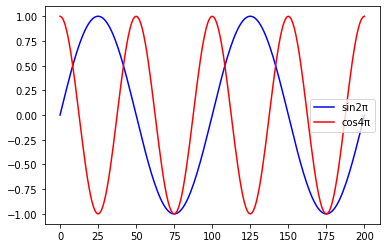

In [57]:
plt.figure()
plt.plot(range(0, len(sin)), sin, color="b", label="sin2π")
plt.plot(range(0, len(cos)), cos, color="red", label="cos4π")
plt.legend()
plt.show()

In [58]:
import pandas as pd

In [59]:
sin_df = pd.DataFrame(sin)

In [60]:
sin_df.drop(0)

,0
1,6.279052e-02
2,1.253332e-01
3,1.873813e-01
4,2.486899e-01
5,3.090170e-01
...,...
196,-2.486899e-01
197,-1.873813e-01
198,-1.253332e-01
199,-6.279052e-02


In [61]:
cos_df = pd.DataFrame(cos)

In [62]:
cos_df.drop(0)

,0
1,0.992115
2,0.968583
3,0.929776
4,0.876307
5,0.809017
...,...
196,0.876307
197,0.929776
198,0.968583
199,0.992115


In [65]:
sin_df.shape

(201, 1)

In [66]:
cos_df.shape

(201, 1)

In [67]:
cos_df

,0
0,1.000000
1,0.992115
2,0.968583
3,0.929776
4,0.876307
...,...
196,0.876307
197,0.929776
198,0.968583
199,0.992115


In [13]:
sin_df = sin_df.iloc[:,0]

In [14]:
sin = sin_df.tolist()

In [15]:
cos_df = cos_df.iloc[:,0]

In [16]:
cos = cos_df.tolist()

In [50]:
cos.shape

AttributeError: 'list' object has no attribute 'shape'

In [76]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(0)

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 0)

    return re_data, re_target

In [18]:
g, h = make_dataset(sin)

In [19]:
g.shape

(176, 25, 1)

In [20]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(1)

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

In [21]:
i,j = make_dataset(cos)

In [22]:
j1 = j.reshape(176,)

In [23]:
h1 = h.reshape(176,)

In [24]:
h1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from keras.utils import np_utils

Using TensorFlow backend.


In [26]:
y_train = np.hstack((h1,j1 ))

In [27]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
x_train = np.vstack((g,i))

In [29]:
x_train.shape

(352, 25, 1)

In [30]:
y_train.shape

(352,)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Masking
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional

In [32]:
from keras.utils import np_utils

In [33]:
y_train = np_utils.to_categorical(y_train)

In [39]:
y_train.shape[1]

2

In [35]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
model = Sequential()
model.add(LSTM(100, input_shape = (x_train.shape[1], x_train.shape[2]), return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.add(Activation("softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 41,002
Trainable params: 41,002
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(x_train, y_train, batch_size = 10, epochs = 30)

Epoch 1/30
36/36 [==============================] - 0s 10ms/step - loss: 0.6996 - accuracy: 0.4830
Epoch 2/30
36/36 [==============================] - 0s 9ms/step - loss: 0.6874 - accuracy: 0.5483
Epoch 3/30
36/36 [==============================] - 0s 9ms/step - loss: 0.6539 - accuracy: 0.5966
Epoch 4/30
36/36 [==============================] - 0s 10ms/step - loss: 0.5757 - accuracy: 0.6875
Epoch 5/30
36/36 [==============================] - 0s 10ms/step - loss: 0.5771 - accuracy: 0.6705
Epoch 6/30
36/36 [==============================] - 0s 9ms/step - loss: 0.5283 - accuracy: 0.7102
Epoch 7/30
36/36 [==============================] - 0s 9ms/step - loss: 0.4517 - accuracy: 0.7528
Epoch 8/30
36/36 [==============================] - 0s 10ms/step - loss: 0.3120 - accuracy: 0.8523
Epoch 9/30
36/36 [==============================] - 0s 10ms/step - loss: 0.2348 - accuracy: 0.8835
Epoch 10/30
36/36 [==============================] - 0s 10ms/step - loss: 0.2199 - accuracy: 0.8977
Epoch 11/30
3

In [47]:
type(history)

tensorflow.python.keras.callbacks.History

In [46]:
def plot_history_loss(fit):
    axL.plot(fit.history['loss'], label = "for training", color = 'dodgerblue')
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')

In [47]:
def plot_history_accuracy(fit):
    axR.plot(fit.history['accuracy'], label = "for training", color = 'dodgerblue')
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')

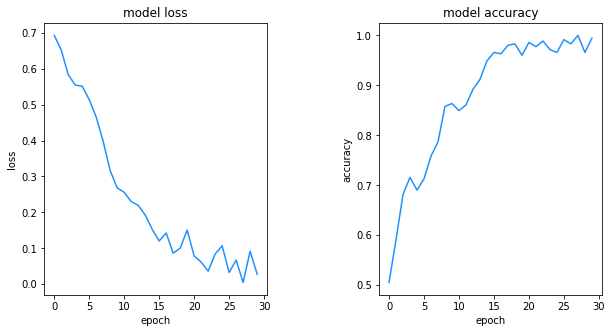

In [48]:
ig, (axL, axR) = plt.subplots(ncols = 2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.5)
plot_history_loss(history)
plot_history_accuracy(history)

In [77]:
def sin( T=100):
    x = np.arange(0, 2 * T + 1)
    return np.sin(2.0 * np.pi * x / T)

In [78]:
sin2 = sin()

In [79]:
sin_df2 = pd.DataFrame(sin2)

In [80]:
sin_df2

,0
0,0.000000e+00
1,6.279052e-02
2,1.253332e-01
3,1.873813e-01
4,2.486899e-01
...,...
196,-2.486899e-01
197,-1.873813e-01
198,-1.253332e-01
199,-6.279052e-02


In [81]:
sin_df.drop(0)

,0
1,6.279052e-02
2,1.253332e-01
3,1.873813e-01
4,2.486899e-01
5,3.090170e-01
...,...
196,-2.486899e-01
197,-1.873813e-01
198,-1.253332e-01
199,-6.279052e-02


In [82]:
k,n  = make_dataset(sin2)

ValueError: cannot reshape array of size 176 into shape (176,0)

In [83]:
k

array([[[ 0.        ],
        [ 0.06279052],
        [ 0.12533323],
        ...,
        [ 0.98228725],
        [ 0.9921147 ],
        [ 0.99802673]],

       [[ 0.06279052],
        [ 0.12533323],
        [ 0.18738131],
        ...,
        [ 0.9921147 ],
        [ 0.99802673],
        [ 1.        ]],

       [[ 0.12533323],
        [ 0.18738131],
        [ 0.24868989],
        ...,
        [ 0.99802673],
        [ 1.        ],
        [ 0.99802673]],

       ...,

       [[-0.9921147 ],
        [-0.99802673],
        [-1.        ],
        ...,
        [-0.30901699],
        [-0.24868989],
        [-0.18738131]],

       [[-0.99802673],
        [-1.        ],
        [-0.99802673],
        ...,
        [-0.24868989],
        [-0.18738131],
        [-0.12533323]],

       [[-1.        ],
        [-0.99802673],
        [-0.9921147 ],
        ...,
        [-0.18738131],
        [-0.12533323],
        [-0.06279052]]])

In [84]:
x_test = k

In [85]:
y_test = np_utils.to_categorical(n)

In [86]:
y_test.shape

(176, 2)

In [87]:
model.evaluate(x_test,y_test,verbose=1)

6/6 [==============================] - 0s 3ms/step - loss: 8.7577 - accuracy: 0.0000e+00


[8.757721900939941, 0.0]

In [62]:
ls

Arduino/
Creative Cloud
FireShot/
Pandas.ipynb
Visual Studio Code.app/
circle-yuka.csv*
classify.py
get_map.py
googlemap.ipynb
iris_classification.py
kaggle/
lstm.py
mydocker/
mygit/
plaidml/
ryusei
sincos分類.ipynb
~$200514_1Y17B022-8_大矢隆晟.docx
~$人工知能画像.pptx
~$　スキルアップ.docx
~$機械学期末レポート.docx
~$ユースラッシュ物件登録用.xlsx
~$コンシェルジュサービス記事.docx
~$ーマンインターフェース期末レポート.docx
写真/
大学用/
研究室/
履歴書万能.pdf
職務履歴書.pdf
履歴書万能.xls
履歴書万能.xls  -  互換モード.pdf
プログラミング/
澤田研究室紹介2020.docx


In [63]:
pwd

'/Users/ryusei/Desktop'

In [84]:
circle  = pd.read_csv("circle-yuka.csv")

In [83]:
clircle

NameError: name 'clircle' is not defined

In [85]:
circle

,Channel,CH1
0,Frequency :,?
1,Period :,?
2,PK-PK :,101.6mV
3,Probe attenuation :,10X
4,Voltage per ADC value:,0.244141mV
...,...,...
10002,9996,277.343750
10003,9997,277.343750
10004,9998,277.343750
10005,9999,277.343750


In [86]:
circle1= circle.drop(0)

In [87]:
circle2= circle1.iloc[6:,:]

In [88]:
circle2.CH1

7        222.656250
8        222.656250
9        222.656250
10       222.656250
11       222.656250
            ...    
10002    277.343750
10003    277.343750
10004    277.343750
10005    277.343750
10006    277.343750
Name: CH1, Length: 10000, dtype: object

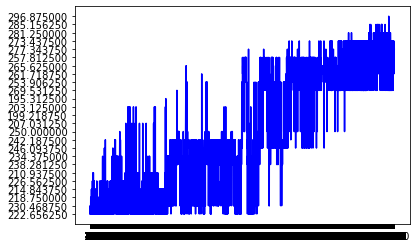

In [98]:

plt.plot(circle2.Channel, circle2.CH1, color="b", label="row_data")
plt.show()